<a href="https://colab.research.google.com/github/KilianCabarcas/A-COMPARATIVE-ANALYSIS-OF-USERS-VS-CRITICS-RATING/blob/main/A_COMPARATIVE_ANALYSIS_OF_USERS_VS_CRITICS_RATING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrantes:** PACHECO GUZMAN JUAN , CABARCAS GAMEZ KILIAN , PABUENA CASTRO ANDRES





**Objetivos de aprendizaje:**

Al finalizar esta actividad el alumno será capaz de:

*   a. Manejar los diferentes comandos de las distintas librerías de datos
*   b. Diseñar e implementar soluciones a problemas de procesamiento de datos.
*   c. Desarrollar destreza en la manipulación y análisis de datos.

**Ejercicio**

Realizar un análisis exploratorio de los conjuntos de datos de Rotten Tomatoes, MetaCritic e IMDb para adquirir una comprensión global de las posibles decisiones futuras que podrían mostrar problemas dentro del conjunto de datos de Fandango. Este estudio pretende profundizar en las metodologías de la ciencia de datos, aprovechando las técnicas estadísticas y de aprendizaje automático para identificar patrones, sesgos y anomalías en las plataformas de clasificación de películas. Al comparar estos conjuntos de datos, podemos descubrir ideas que pueden sugerir discrepancias sistémicas en el sistema de clasificación de Fandango, contribuyendo a un debate más informado sobre la integridad de los datos y la orientación de los consumidores en la industria cinematográfica. y la orientación del consumidor en la industria cinematográfica.

Mucha suerte.


# Fandango

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the DataFrame
df_fandango = pd.read_csv("fandango.csv")

In [ ]:
# Explore the first 5 observations.
df_fandango.head()

In [ ]:
# General information.
df_fandango.info()

In [ ]:
# General description.
df_fandango.describe()

# Rotten Tomatoes ,MetaCritic e IMDb

In [ ]:
df_other_sites = pd.read_csv("all_sites_scores.csv")

NameError: name 'pd' is not defined

# Rotten Tomatoes

1. Este codigo nos permitira explorar la relación entre las reseñas de los críticos de Rotten Tomatoes y las reseñas de los usuarios de Rotten Tomatoes.

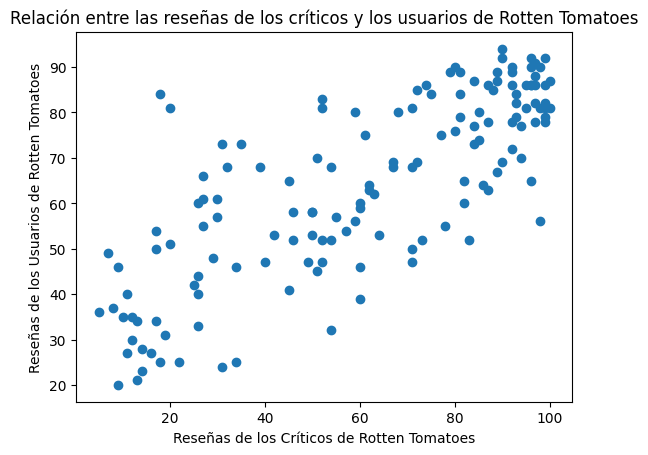

In [ ]:
df_ratings = df_other_sites[['RottenTomatoes', 'RottenTomatoes_User']]

df_ratings = df_ratings.dropna()

plt.scatter(df_ratings['RottenTomatoes'], df_ratings['RottenTomatoes_User'])
plt.xlabel('Reseñas de los Críticos de Rotten Tomatoes')
plt.ylabel('Reseñas de los Usuarios de Rotten Tomatoes')
plt.title('Relación entre las reseñas de los críticos y los usuarios de Rotten Tomatoes')
plt.show()

2.Este código está creando un grafico para comparar las calificaciones de críticos y usuarios en Rotten Tomatotes.

En este se puede ver:
*   La distribución de las valoraciones de los críticos no parece distribuida normalmente.
*   La distribución de las valoraciones de los usuarios parece sesgada a la derecha.



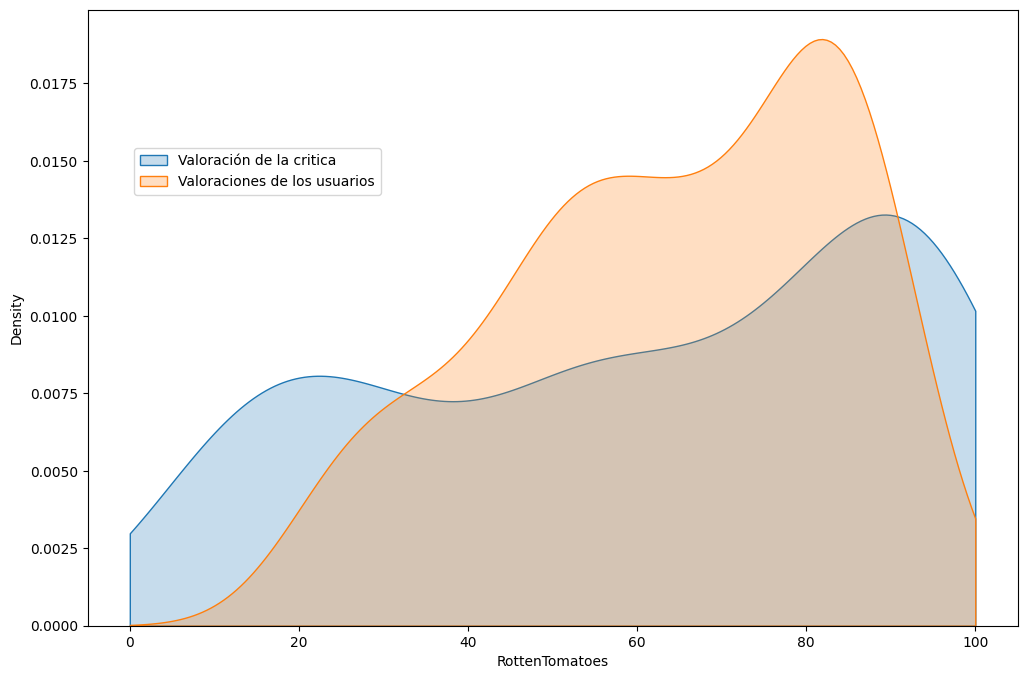

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.kdeplot(data=df_other_sites, x='RottenTomatoes',
             clip=[0,100], fill=True, label='Valoracion de la critica', ax=ax)
sns.kdeplot(data=df_other_sites, x='RottenTomatoes_User',
             clip=[0,100], fill=True, label='Valoraciones de los usuarios', ax=ax)
ax.legend(loc=(0.05,0.7));

3. Este código está calculando la diferenica entre las calificaciones de críticos y usuarios en Rotten Tomatoes.

Tambien añadir una nueva columna al data set.

In [ ]:
df_other_sites['Diff_RottenTomatoes'] = (df_other_sites['RottenTomatoes'] - df_other_sites['RottenTomatoes_User'] ).round(1)

# Mostrar las columnas relevantes
df_other_sites[ ['Diff_RottenTomatoes', 'RottenTomatoes', 'RottenTomatoes_User']]

,Diff_RottenTomatoes,RottenTomatoes,RottenTomatoes_User
0,-12,74,86
1,5,85,80
2,-10,80,90
3,-66,18,84
4,-14,14,28
...,...,...,...
141,9,87,78
142,15,97,82
143,19,97,78
144,19,100,81


4. Este codigo mostrara:


*   Que películas tienen la mayor diferencia negativa(-) en crítica y usuario
*    Que películas tienen la mayor diferencia positiva(+) en crítica y usuario



In [ ]:
df_other_sites.sort_values(by='Diff_RottenTomatoes', ascending=True)[ ['FILM','Diff_RottenTomatoes']].head()

,FILM,Diff_RottenTomatoes
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [ ]:
df_other_sites.sort_values(by='Diff_RottenTomatoes', ascending=False)[ ['FILM','Diff_RottenTomatoes']].head()

,FILM,Diff_RottenTomatoes
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


5.Este código se esta mostrando la distribucion de las diferencias de usuarios y la critica.

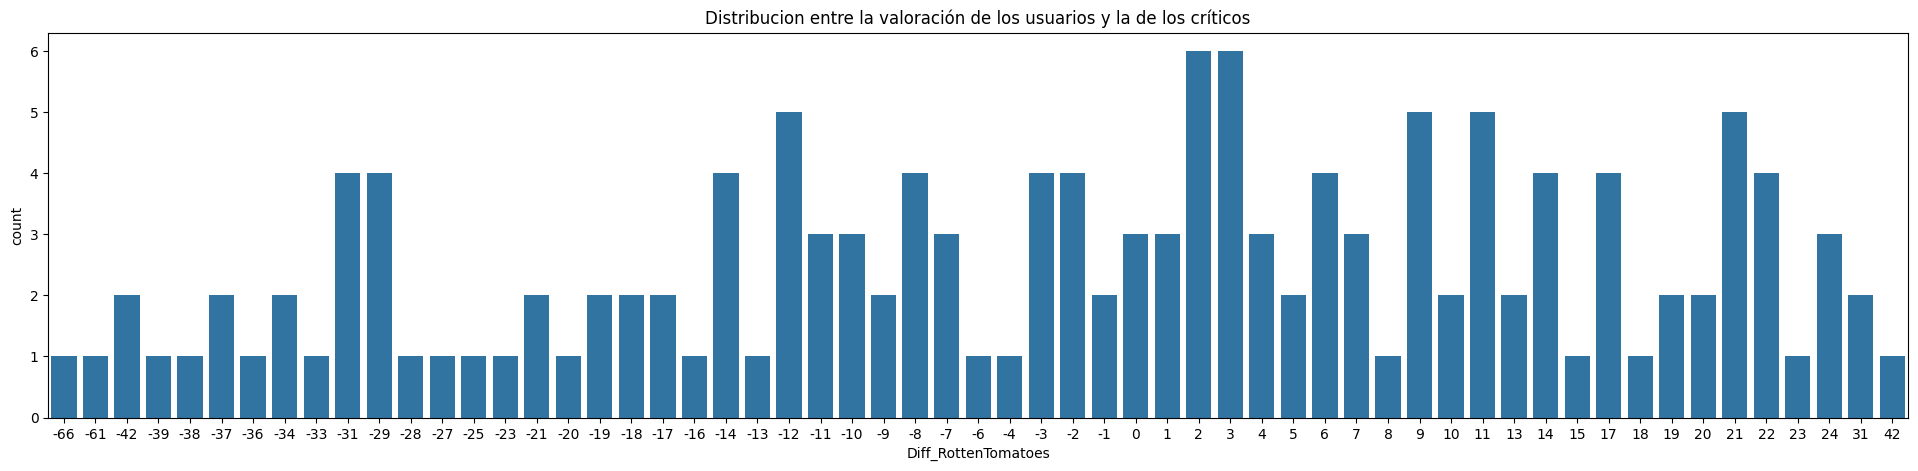

In [ ]:
df_other_sites['Diff_RottenTomatoes'] = (
   df_other_sites['RottenTomatoes'] - df_other_sites['RottenTomatoes_User']
).round(1)


plt.figure(figsize=(24, 5))
plt.title('Distribucion entre la valoración de los usuarios y la de los críticos')

plot = sns.countplot(
   data=df_other_sites,
   x='Diff_RottenTomatoes'
)

plt.show()

# MetaCritic

1. Este codigo nos permitira explorar la relación entre las reseñas de los críticos de Metacritic y las reseñas de los usuarios de Metacritic.

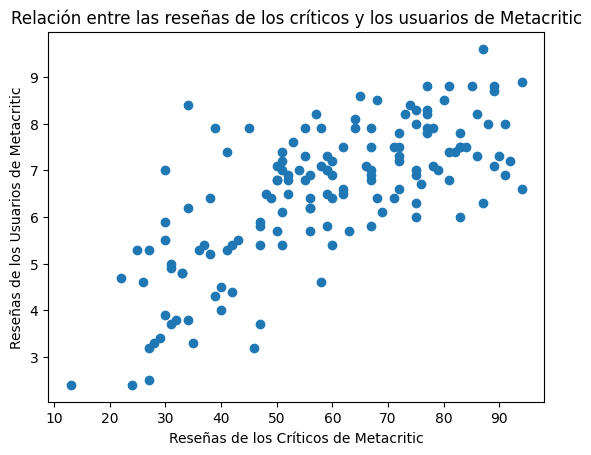

In [ ]:
df_ratings = df_other_sites[['Metacritic', 'Metacritic_User']]

df_ratings = df_ratings.dropna()

plt.scatter(df_ratings['Metacritic'], df_ratings['Metacritic_User'])
plt.xlabel('Reseñas de los Críticos de Metacritic')
plt.ylabel('Reseñas de los Usuarios de Metacritic')
plt.title('Relación entre las reseñas de los críticos y los usuarios de Metacritic')
plt.show()

# IMBD

1.Crear un gráfico de dispersión para la relación entre el recuento de votos en MetaCritic frente al recuento de votos en IMDB.

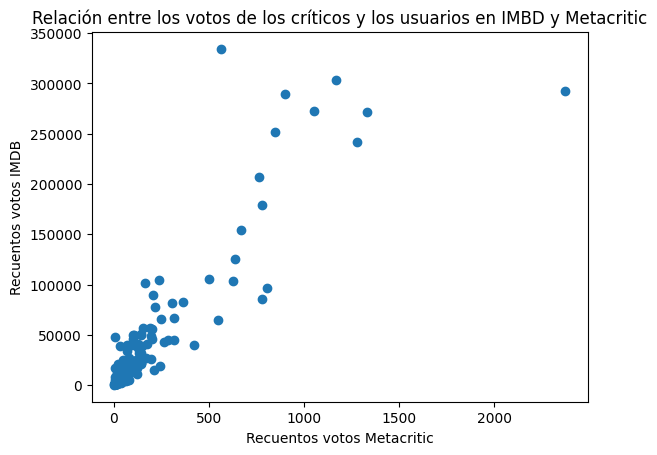

In [ ]:
df_ratings = df_other_sites[['Metacritic_user_vote_count', 'IMDB_user_vote_count']]

df_ratings = df_ratings.dropna()

plt.scatter(df_ratings['Metacritic_user_vote_count'], df_ratings['IMDB_user_vote_count'])
plt.xlabel('Recuentos votos Metacritic')
plt.ylabel('Recuentos votos IMDB')
plt.title('Relación entre los votos de los críticos y los usuarios en IMBD y Metacritic')
plt.show()

2.

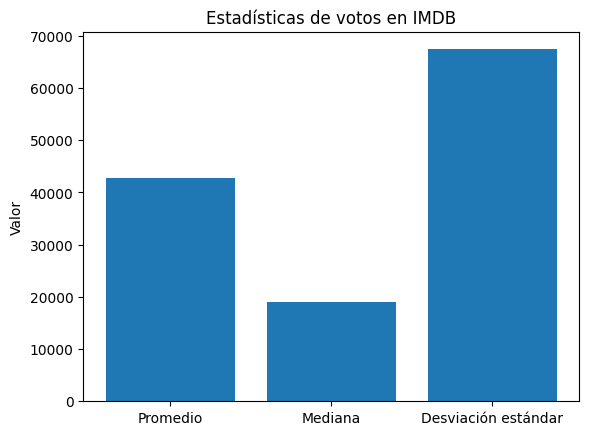

In [ ]:
mean = df_other_sites['IMDB_user_vote_count'].mean()
median = df_other_sites['IMDB_user_vote_count'].median()
std = df_other_sites['IMDB_user_vote_count'].std()

# Grafica de barras para promedio, mediana y desviación estándar
labels = ['Promedio', 'Mediana', 'Desviación estándar']
values = [mean, median, std]

fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_title('Estadísticas de votos en IMDB')
ax.set_ylabel('Valor')

plt.show()

# Todos los sitios

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_fandango = pd.read_csv("fandango.csv")
df_other_sites = pd.read_csv("all_sites_scores.csv")

1. Normalizamos segun el sistema de puntuación Fandango de 0-5

In [ ]:
sites = ['RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']

for col in sites:
  if col == 'RottenTomatoes' or col == 'RottenTomatoes_User':
    divisor = 20
  elif col == 'Metacritic' or col == 'Metacritic_User':
    divisor = 20
  elif col == 'IMDB':
    divisor = 10

  df_other_sites[f'{col}_Normalized'] = (df_other_sites[col] / divisor).round(2)

2.En este codigo vamos a ver una relacion entre la valoraciones de Metacritic Y Fandango


* Los métodos de puntuación de Fandango son ocultos, mientras que metacritic toma una media ponderada de todas las puntuaciones de críticos publicadas.

* La media y la mediana de fandango es mucho mayor, tambien tienen una desviación estándar mas alta.

* La desviación estandar de fandango tambien es alta porque la mayoria de sus puntuaciones están agrupadas en el lado alto y una gran cantidad se encuentran en el 0.

* Metacritic tiene una mediana y media cercana al 3,0 que se puede decir que es una distribucion normal

Hagamos un diagrama de dispersión entre fandango y metacritic para ver si podemos establecer alguna correlación.


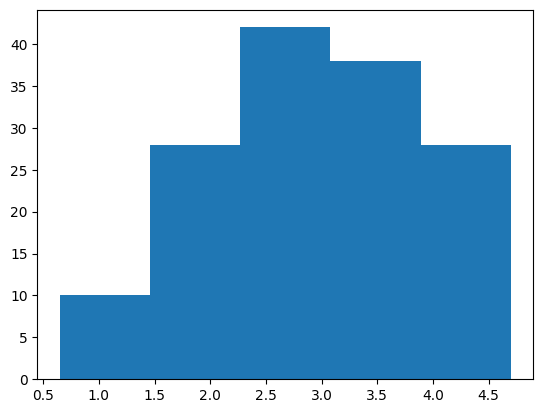

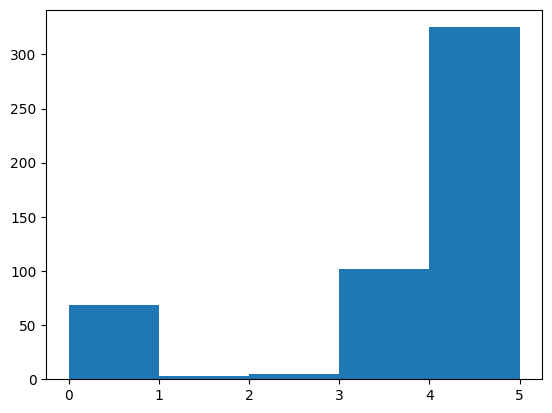

Media: Fandango: 3.558531746031746 Metacritic: 2.94041095890411
Mediana: Fandango: 4.0 Metacritic: 2.95
Desviacion: Fandango: 1.563133490502123 Metacritic: 0.9758694632267088


In [ ]:
mc = df_other_sites['Metacritic_Normalized']
fd = df_fandango['STARS']

plt.hist(mc, 5)
plt.show()

plt.hist(fd, 5)
plt.show()

mean_fd = fd.mean()
mean_mc = mc.mean()
median_fd = fd.median()
median_mc = mc.median()
std_fd = fd.std()
std_mc = mc.std()

print(f"Media: Fandango: {mean_fd} Metacritic: {mean_mc}")
print(f"Mediana: Fandango: {median_fd} Metacritic: {median_mc}")
print(f"Desviacion: Fandango: {std_fd} Metacritic: {std_mc}")

3. Es este codigo se crea un nuevo dataset que solo contenga las valoraciones normalizadas y las STARS y RATING de fandango.

Y en este se muestra las mejores y peores peliculas calificadas.



In [ ]:

df_stars_rating = df_fandango[['FILM', 'STARS' ,'RATING'] ]
df_norm_scores =  df_other_sites[['RottenTomatoes_Normalized' ,	'RottenTomatoes_User_Normalized',	'Metacritic_Normalized', 'Metacritic_User_Normalized',	'IMDB_Normalized']]

df_norm = pd.concat([ df_stars_rating ,df_norm_scores ], axis=1)



In [ ]:
df_norm.head(1).T

MejoresPelis = df_norm.sort_values(
    by='STARS', ascending=True
).tail(10)

MejoresPelis

,FILM,STARS,RATING,RottenTomatoes_Normalized,RottenTomatoes_User_Normalized,Metacritic_Normalized,Metacritic_User_Normalized,IMDB_Normalized
317,Cheatin' (2015),5.0,5.0,NaN,NaN,NaN,NaN,NaN
174,Assassination (2015),5.0,4.6,NaN,NaN,NaN,NaN,NaN
323,League of Legends LCS Summer Finals (2015),5.0,5.0,NaN,NaN,NaN,NaN,NaN
96,TCM presents Jaws 40th Anniversary (2015),5.0,4.8,4.95,4.60,4.30,0.41,0.82
325,The Little Death (2015),5.0,4.5,NaN,NaN,NaN,NaN,NaN
169,Royal Ballet: Swan Lake (2015),5.0,4.5,NaN,NaN,NaN,NaN,NaN
102,A La Mala (2015),5.0,4.6,3.10,3.15,2.55,0.30,0.66
167,The Hunger Games: Mockingjay - Part 2 (2015),5.0,4.7,NaN,NaN,NaN,NaN,NaN
330,Soaked In Bleach (2015),5.0,5.0,NaN,NaN,NaN,NaN,NaN
433,The Wanted 18 (2015),5.0,5.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_norm.head(1).T

PeoresPelis = df_norm.sort_values(
    by='STARS', ascending=False
).tail(10)

PeoresPelis

,FILM,STARS,RATING,RottenTomatoes_Normalized,RottenTomatoes_User_Normalized,Metacritic_Normalized,Metacritic_User_Normalized,IMDB_Normalized
458,How to Change the World (2015),0.0,0.0,NaN,NaN,NaN,NaN,NaN
459,Insanity (2015),0.0,0.0,NaN,NaN,NaN,NaN,NaN
460,Jilebi (2015),0.0,0.0,NaN,NaN,NaN,NaN,NaN
461,Journey to Space 3D (2015),0.0,0.0,NaN,NaN,NaN,NaN,NaN
462,La face cache de Margo (2015),0.0,0.0,NaN,NaN,NaN,NaN,NaN
463,La leon (2015),0.0,0.0,NaN,NaN,NaN,NaN,NaN
464,La passion d'Augustine (2015),0.0,0.0,NaN,NaN,NaN,NaN,NaN
465,Le gaucher (2015),0.0,0.0,NaN,NaN,NaN,NaN,NaN
466,Le monde de demain (2015),0.0,0.0,NaN,NaN,NaN,NaN,NaN
503,Zarafa (2012),0.0,0.0,NaN,NaN,NaN,NaN,NaN


4. En este codigo se crea un histplot comparando todas las puntuaciones normalizadas.

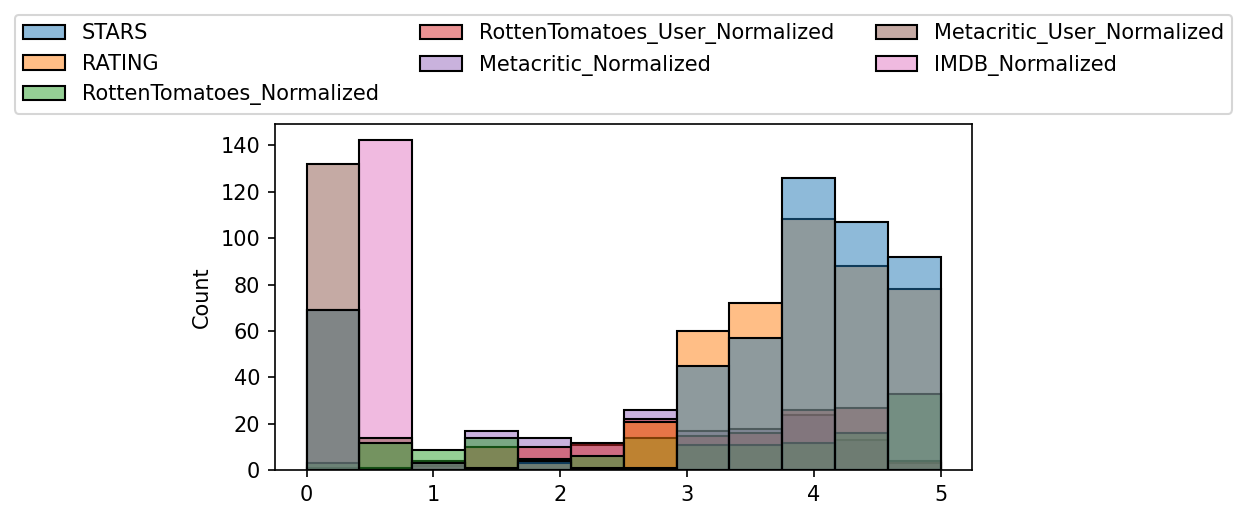

In [ ]:
plt.figure(figsize=(6,3),dpi=150)
grafica = sns.histplot(data=df_norm,  fill=True);

sns.move_legend(grafica, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title_fontsize=14)